XGBoost not installed. Install with: pip install xgboost
LightGBM not installed. Install with: pip install lightgbm
BANK MARKETING CAMPAIGN ANALYSIS
Complete Data Science Pipeline
STEP 1: DATA LOADING AND INITIAL EXPLORATION
Training set shape: (45211, 17)
Test set shape: (4521, 17)
Total samples: 49732

--- DATASET INFO ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45

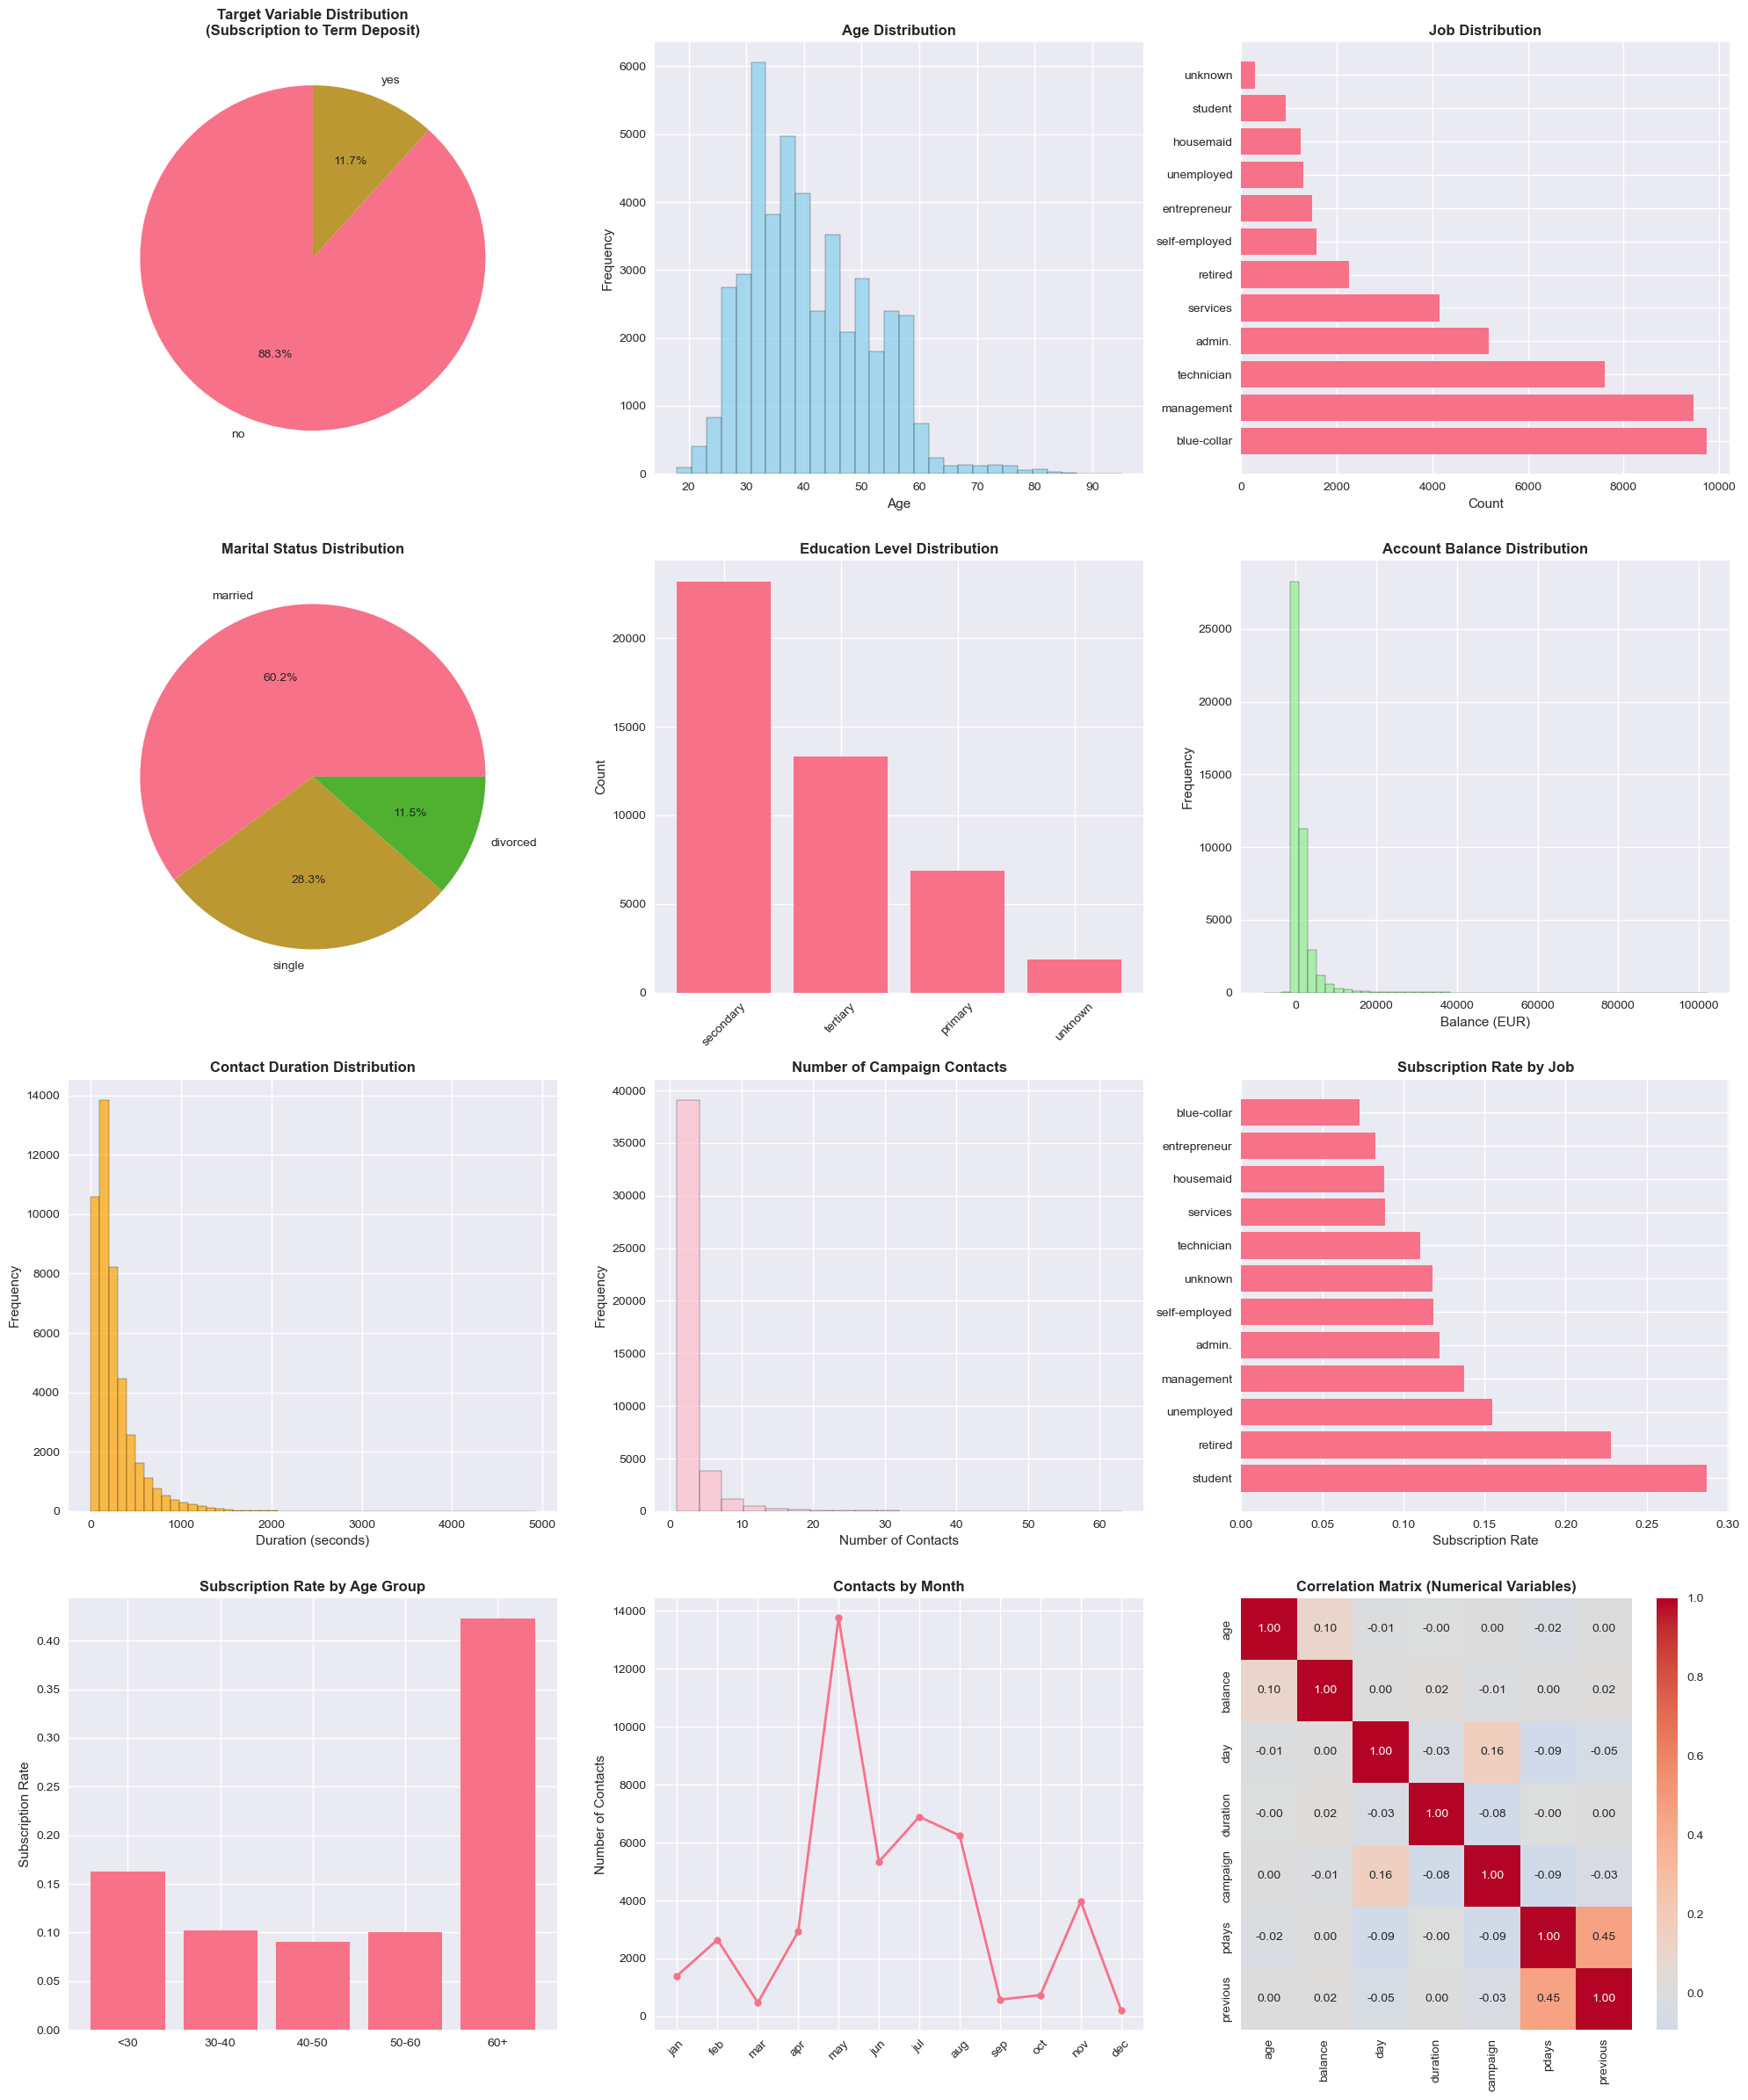


--- KEY INSIGHTS FROM EDA ---
1. Average age of clients: 40.9 years
2. Most common job: blue-collar
3. Average account balance: 1362 EUR
4. Average contact duration: 258 seconds
5. Most successful month: mar

STEP 3: ADVANCED ANALYSIS


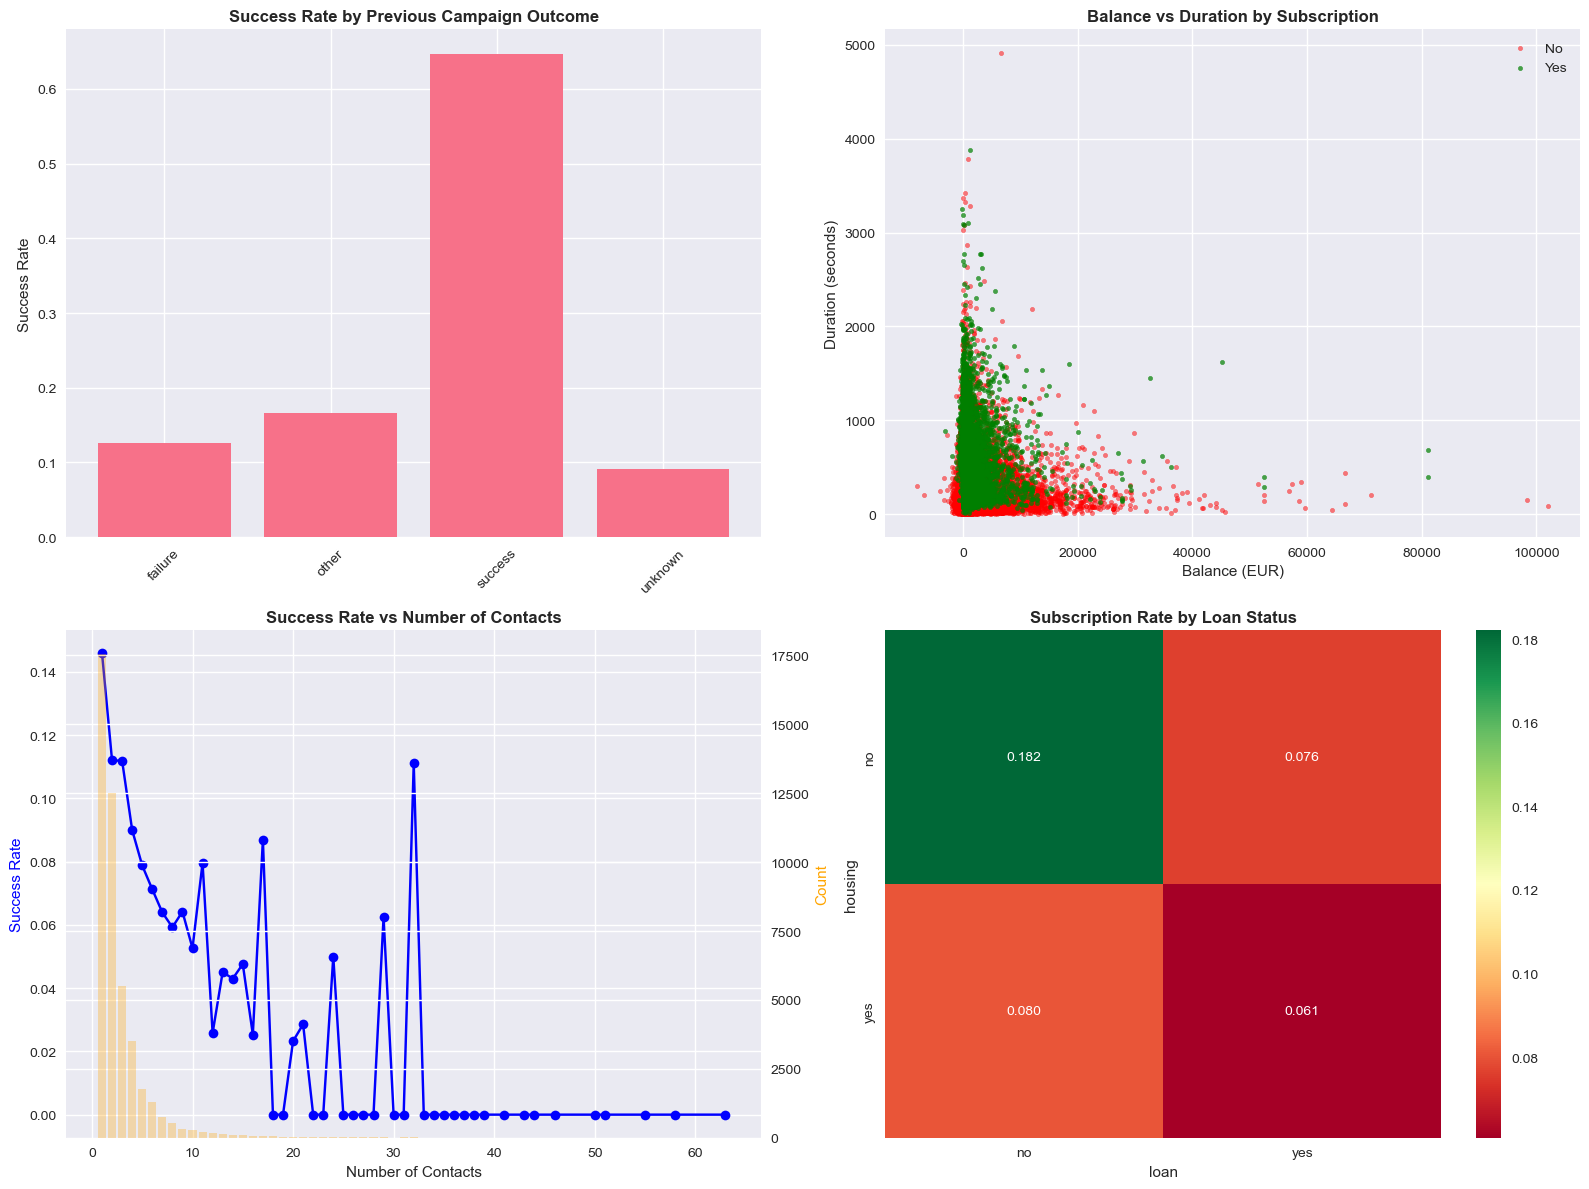


--- ADVANCED INSIGHTS ---
1. Clients with 'success' in previous campaign have 64.7% subscription rate
2. Average duration for successful subscriptions: 537 seconds
3. Average duration for unsuccessful contacts: 221 seconds
4. Optimal number of contacts appears to be: 1

STEP 4: DATA PREPROCESSING
Creating new features...
Encoding categorical variables...
Final feature matrix shape: (45211, 20)
Number of features: 20

STEP 5: COMPREHENSIVE MODEL COMPARISON
Evaluating models using 5-fold cross-validation...
------------------------------------------------------------
Training Logistic Regression...
  AUC: 0.8864 (+/- 0.0038)
Training Random Forest...
  AUC: 0.9223 (+/- 0.0059)
Training Gradient Boosting...
  AUC: 0.9225 (+/- 0.0073)
Training Extra Trees...
  AUC: 0.9163 (+/- 0.0066)
Training Linear SVM...
  AUC: 0.8880 (+/- 0.0040)
Training K-Nearest Neighbors...
  AUC: 0.8123 (+/- 0.0062)
Training Naive Bayes...
  AUC: 0.8490 (+/- 0.0163)
Training Neural Network...
  AUC: 0.8976 (+/- 0

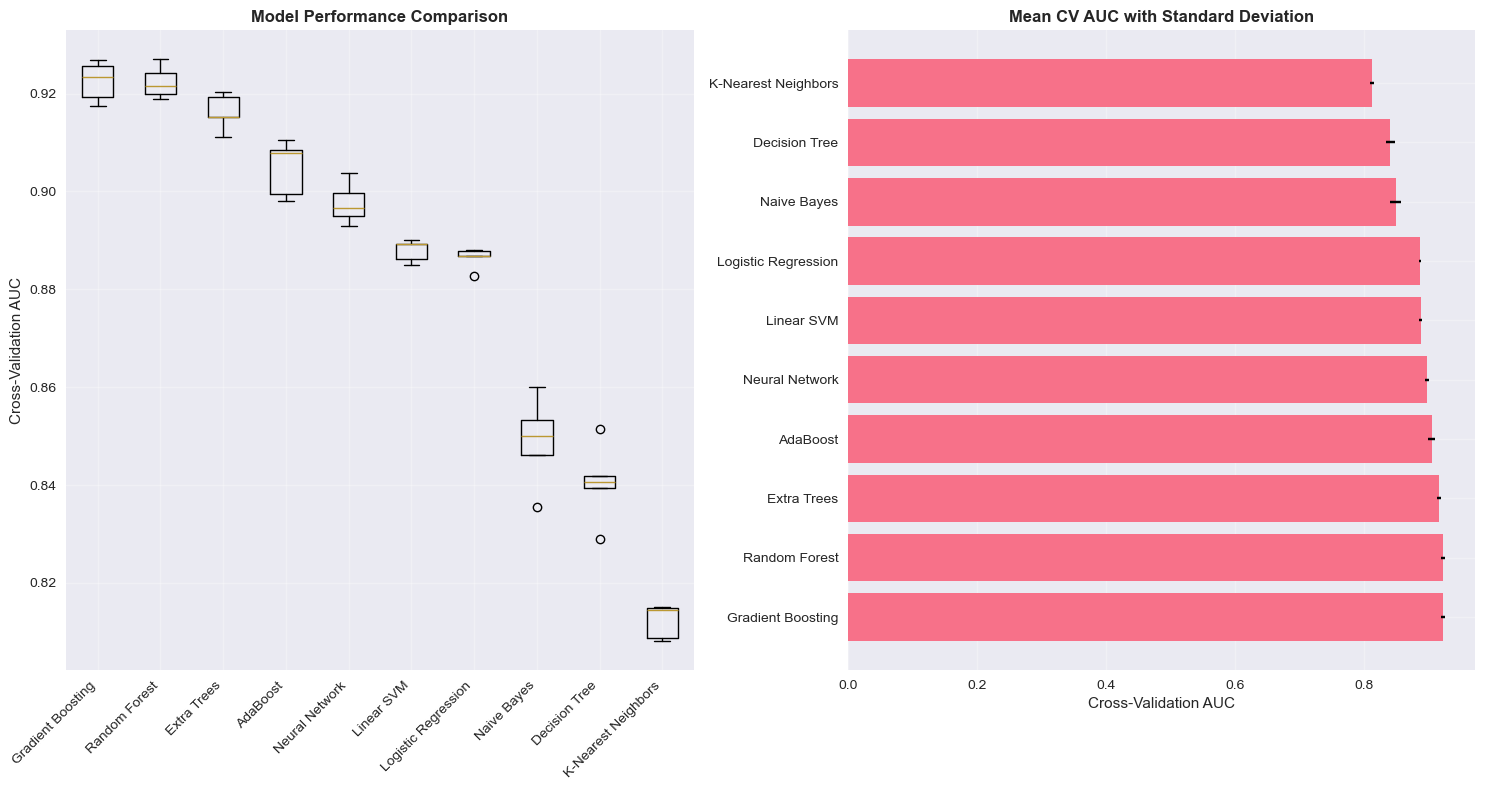


STEP 6: ADVANCED HYPERPARAMETER TUNING

Tuning Gradient Boosting...
----------------------------------------
Using RandomizedSearchCV for Gradient Boosting (faster for large search spaces)
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best CV AUC: 0.9338
Best parameters: {'learning_rate': 0.04482179215207487, 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 15, 'n_estimators': 239, 'subsample': 0.9407315718760048}
Improvement: +0.0113

Tuning Random Forest...
----------------------------------------
Using RandomizedSearchCV for Random Forest (faster for large search spaces)
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best CV AUC: 0.9279
Best parameters: {'bootstrap': True, 'max_depth': None, 'max_features': 0.5, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 452}
Improvement: +0.0055

Tuning Extra Trees...
----------------------------------------
Using GridSearchCV for Extra Trees
Fitting 5 folds for each of 540 candidates

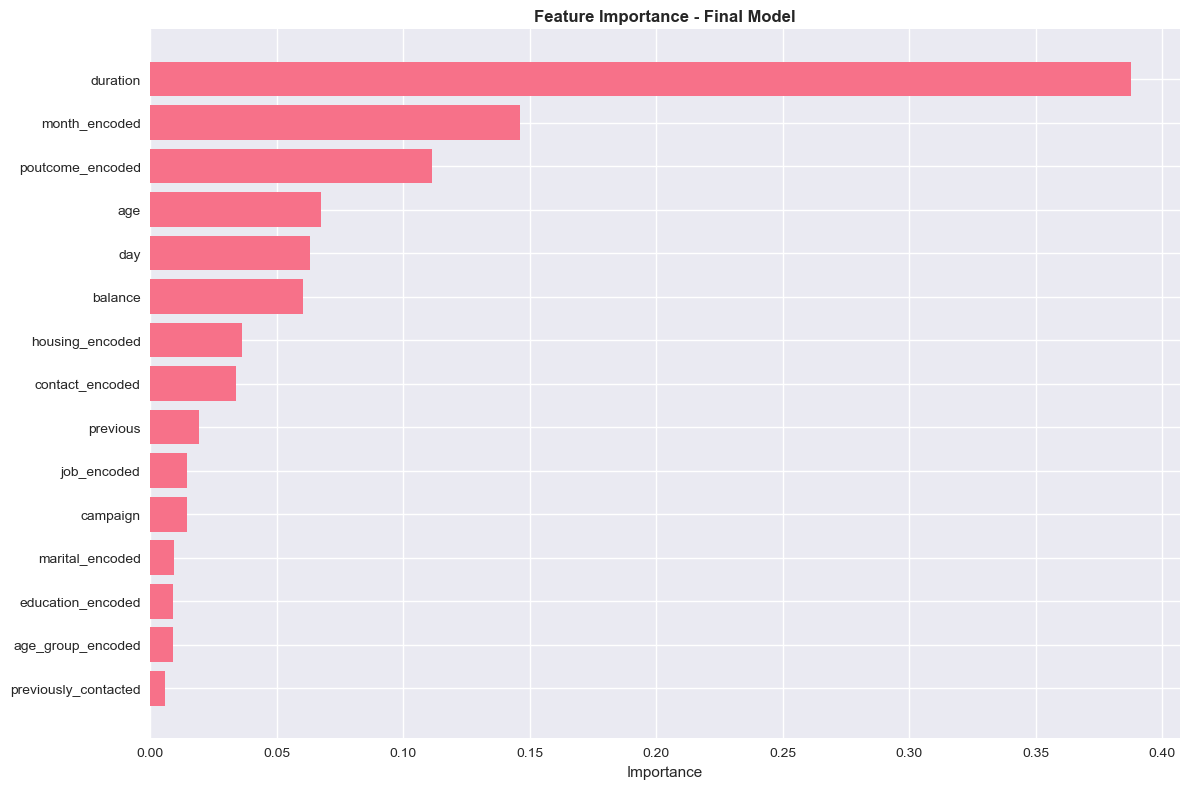


BONUS: Gradient Boosting Comparison

GRADIENT BOOSTING ALGORITHMS COMPARISON
Performance Comparison:
----------------------------------------
Sklearn GradientBoosting  - AUC: 0.9225 (+/- 0.0073)

Key Differences:
• Sklearn GradientBoosting: Stable, well-tested, slower training
• XGBoost: Optimized C++, handles missing values, regularization
• LightGBM: Fastest training, memory efficient, leaf-wise growth

FINAL MODEL PERFORMANCE
Cross-validation AUC scores: [0.6291152  0.48114801 0.49083327 0.42666642 0.6991322 ]
Mean CV AUC: 0.5454 (+/- 0.2037)

Test set predictions generated!
Prediction range: 0.0016 to 0.9592
Predictions saved to 'bank_marketing_predictions.csv'

MODEL SUMMARY
Final Model: GradientBoostingClassifier
Final AUC Score: 0.9338
Total Models Evaluated: 3
Top 3 Models after tuning:
  1. Gradient Boosting: 0.9338
  2. Random Forest: 0.9279
  3. Extra Trees: 0.9243

ANALYSIS COMPLETE!


In [1]:
# Complete Bank Marketing Data Analysis and Machine Learning
# Dataset: Bank Marketing Campaign Analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# ==============================================================================
# 1. DATA LOADING AND INITIAL EXPLORATION
# ==============================================================================

def load_and_explore_data(train_path, test_path):
    """Load and perform initial exploration of the dataset"""
    
    print("="*60)
    print("STEP 1: DATA LOADING AND INITIAL EXPLORATION")
    print("="*60)
    
    # Load the datasets
    train_df = pd.read_csv(train_path, sep=";")
    test_df = pd.read_csv(test_path, sep=";")
    
    print(f"Training set shape: {train_df.shape}")
    print(f"Test set shape: {test_df.shape}")
    print(f"Total samples: {train_df.shape[0] + test_df.shape[0]}")
    
    # Basic info about the dataset
    print("\n--- DATASET INFO ---")
    print(train_df.info())
    
    # First few rows
    print("\n--- FIRST 5 ROWS ---")
    print(train_df.head())
    
    # Statistical summary
    print("\n--- STATISTICAL SUMMARY ---")
    print(train_df.describe())
    
    # Check for missing values
    print("\n--- MISSING VALUES ---")
    missing_values = train_df.isnull().sum()
    print(missing_values[missing_values > 0])
    if missing_values.sum() == 0:
        print("No missing values found!")
    
    # Target variable distribution
    print("\n--- TARGET VARIABLE DISTRIBUTION ---")
    target_dist = train_df['y'].value_counts()
    target_pct = train_df['y'].value_counts(normalize=True) * 100
    print(f"No (didn't subscribe): {target_dist['no']} ({target_pct['no']:.1f}%)")
    print(f"Yes (subscribed): {target_dist['yes']} ({target_pct['yes']:.1f}%)")
    
    return train_df, test_df

# ==============================================================================
# 2. EXPLORATORY DATA ANALYSIS (EDA)
# ==============================================================================

def perform_eda(df):
    """Comprehensive Exploratory Data Analysis"""
    
    print("\n" + "="*60)
    print("STEP 2: EXPLORATORY DATA ANALYSIS")
    print("="*60)
    
    # Create figure with multiple subplots
    fig = plt.figure(figsize=(20, 24))
    
    # 1. Target Variable Distribution
    plt.subplot(4, 3, 1)
    target_counts = df['y'].value_counts()
    plt.pie(target_counts.values, labels=target_counts.index, autopct='%1.1f%%', startangle=90)
    plt.title('Target Variable Distribution\n(Subscription to Term Deposit)', fontsize=12, fontweight='bold')
    
    # 2. Age Distribution
    plt.subplot(4, 3, 2)
    plt.hist(df['age'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    plt.title('Age Distribution', fontweight='bold')
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    
    # 3. Job Distribution
    plt.subplot(4, 3, 3)
    job_counts = df['job'].value_counts()
    plt.barh(job_counts.index, job_counts.values)
    plt.title('Job Distribution', fontweight='bold')
    plt.xlabel('Count')
    
    # 4. Marital Status Distribution
    plt.subplot(4, 3, 4)
    marital_counts = df['marital'].value_counts()
    plt.pie(marital_counts.values, labels=marital_counts.index, autopct='%1.1f%%')
    plt.title('Marital Status Distribution', fontweight='bold')
    
    # 5. Education Level Distribution
    plt.subplot(4, 3, 5)
    education_counts = df['education'].value_counts()
    plt.bar(education_counts.index, education_counts.values)
    plt.title('Education Level Distribution', fontweight='bold')
    plt.xticks(rotation=45)
    plt.ylabel('Count')
    
    # 6. Balance Distribution
    plt.subplot(4, 3, 6)
    plt.hist(df['balance'], bins=50, alpha=0.7, color='lightgreen', edgecolor='black')
    plt.title('Account Balance Distribution', fontweight='bold')
    plt.xlabel('Balance (EUR)')
    plt.ylabel('Frequency')
    
    # 7. Contact Duration Distribution
    plt.subplot(4, 3, 7)
    plt.hist(df['duration'], bins=50, alpha=0.7, color='orange', edgecolor='black')
    plt.title('Contact Duration Distribution', fontweight='bold')
    plt.xlabel('Duration (seconds)')
    plt.ylabel('Frequency')
    
    # 8. Campaign Contacts Distribution
    plt.subplot(4, 3, 8)
    plt.hist(df['campaign'], bins=20, alpha=0.7, color='pink', edgecolor='black')
    plt.title('Number of Campaign Contacts', fontweight='bold')
    plt.xlabel('Number of Contacts')
    plt.ylabel('Frequency')
    
    # 9. Subscription Rate by Job
    plt.subplot(4, 3, 9)
    job_subscription = df.groupby('job')['y'].apply(lambda x: (x == 'yes').mean()).sort_values(ascending=False)
    plt.barh(job_subscription.index, job_subscription.values)
    plt.title('Subscription Rate by Job', fontweight='bold')
    plt.xlabel('Subscription Rate')
    
    # 10. Subscription Rate by Age Group
    plt.subplot(4, 3, 10)
    df['age_group'] = pd.cut(df['age'], bins=[0, 30, 40, 50, 60, 100], labels=['<30', '30-40', '40-50', '50-60', '60+'])
    age_subscription = df.groupby('age_group')['y'].apply(lambda x: (x == 'yes').mean())
    plt.bar(age_subscription.index, age_subscription.values)
    plt.title('Subscription Rate by Age Group', fontweight='bold')
    plt.ylabel('Subscription Rate')
    
    # 11. Monthly Contact Distribution
    plt.subplot(4, 3, 11)
    month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
    month_counts = df['month'].value_counts().reindex(month_order)
    plt.plot(month_counts.index, month_counts.values, marker='o', linewidth=2, markersize=6)
    plt.title('Contacts by Month', fontweight='bold')
    plt.xticks(rotation=45)
    plt.ylabel('Number of Contacts')
    
    # 12. Correlation Heatmap (for numerical variables)
    plt.subplot(4, 3, 12)
    numerical_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
    correlation_matrix = df[numerical_cols].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
    plt.title('Correlation Matrix (Numerical Variables)', fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # Additional insights
    print("\n--- KEY INSIGHTS FROM EDA ---")
    print(f"1. Average age of clients: {df['age'].mean():.1f} years")
    print(f"2. Most common job: {df['job'].value_counts().index[0]}")
    print(f"3. Average account balance: {df['balance'].mean():.0f} EUR")
    print(f"4. Average contact duration: {df['duration'].mean():.0f} seconds")
    print(f"5. Most successful month: {df.groupby('month')['y'].apply(lambda x: (x == 'yes').mean()).idxmax()}")

# ==============================================================================
# 3. ADVANCED ANALYSIS
# ==============================================================================

def advanced_analysis(df):
    """Perform advanced analysis and insights"""
    
    print("\n" + "="*60)
    print("STEP 3: ADVANCED ANALYSIS")
    print("="*60)
    
    # Create advanced visualizations
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # 1. Success rate by previous campaign outcome
    prev_outcome_success = df.groupby('poutcome')['y'].apply(lambda x: (x == 'yes').mean())
    axes[0,0].bar(prev_outcome_success.index, prev_outcome_success.values)
    axes[0,0].set_title('Success Rate by Previous Campaign Outcome', fontweight='bold')
    axes[0,0].set_ylabel('Success Rate')
    axes[0,0].tick_params(axis='x', rotation=45)
    
    # 2. Balance vs Duration colored by subscription
    scatter_yes = df[df['y'] == 'yes']
    scatter_no = df[df['y'] == 'no']
    axes[0,1].scatter(scatter_no['balance'], scatter_no['duration'], alpha=0.5, label='No', color='red', s=10)
    axes[0,1].scatter(scatter_yes['balance'], scatter_yes['duration'], alpha=0.7, label='Yes', color='green', s=10)
    axes[0,1].set_xlabel('Balance (EUR)')
    axes[0,1].set_ylabel('Duration (seconds)')
    axes[0,1].set_title('Balance vs Duration by Subscription', fontweight='bold')
    axes[0,1].legend()
    
    # 3. Success rate by number of contacts
    campaign_success = df.groupby('campaign')['y'].apply(lambda x: (x == 'yes').mean())
    campaign_counts = df['campaign'].value_counts().sort_index()
    
    ax1 = axes[1,0]
    ax2 = ax1.twinx()
    
    line1 = ax1.plot(campaign_success.index, campaign_success.values, 'b-o', label='Success Rate')
    bar1 = ax2.bar(campaign_counts.index, campaign_counts.values, alpha=0.3, color='orange', label='Count')
    
    ax1.set_xlabel('Number of Contacts')
    ax1.set_ylabel('Success Rate', color='blue')
    ax2.set_ylabel('Count', color='orange')
    ax1.set_title('Success Rate vs Number of Contacts', fontweight='bold')
    
    # 4. Subscription rate by housing and personal loan status
    loan_analysis = df.groupby(['housing', 'loan'])['y'].apply(lambda x: (x == 'yes').mean()).unstack()
    sns.heatmap(loan_analysis, annot=True, fmt='.3f', cmap='RdYlGn', ax=axes[1,1])
    axes[1,1].set_title('Subscription Rate by Loan Status', fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # Print key insights
    print("\n--- ADVANCED INSIGHTS ---")
    print(f"1. Clients with 'success' in previous campaign have {prev_outcome_success['success']:.1%} subscription rate")
    print(f"2. Average duration for successful subscriptions: {df[df['y']=='yes']['duration'].mean():.0f} seconds")
    print(f"3. Average duration for unsuccessful contacts: {df[df['y']=='no']['duration'].mean():.0f} seconds")
    print(f"4. Optimal number of contacts appears to be: {campaign_success.idxmax()}")

# ==============================================================================
# 4. DATA PREPROCESSING FOR MACHINE LEARNING
# ==============================================================================

def preprocess_data(train_df, test_df):
    """Preprocess data for machine learning"""
    
    print("\n" + "="*60)
    print("STEP 4: DATA PREPROCESSING")
    print("="*60)
    
    # Combine datasets for consistent preprocessing
    train_df['dataset'] = 'train'
    test_df['dataset'] = 'test'
    
    # If test set doesn't have target variable, create a placeholder
    if 'y' not in test_df.columns:
        test_df['y'] = 'unknown'
    
    combined_df = pd.concat([train_df, test_df], ignore_index=True)
    
    # Feature Engineering
    print("Creating new features...")
    
    # Age groups
    combined_df['age_group'] = pd.cut(combined_df['age'], 
                                    bins=[0, 30, 40, 50, 60, 100], 
                                    labels=['young', 'middle_young', 'middle', 'middle_old', 'old'])
    
    # Balance categories
    combined_df['balance_category'] = pd.cut(combined_df['balance'], 
                                           bins=[-np.inf, 0, 1000, 5000, np.inf], 
                                           labels=['negative', 'low', 'medium', 'high'])
    
    # Duration categories
    combined_df['duration_category'] = pd.cut(combined_df['duration'], 
                                            bins=[0, 100, 300, 600, np.inf], 
                                            labels=['very_short', 'short', 'medium', 'long'])
    
    # Previous contact indicator
    combined_df['previously_contacted'] = (combined_df['pdays'] != -1).astype(int)
    
    # Campaign intensity
    combined_df['campaign_intensity'] = pd.cut(combined_df['campaign'], 
                                             bins=[0, 2, 5, 10, np.inf], 
                                             labels=['low', 'medium', 'high', 'very_high'])
    
    # Encode categorical variables
    print("Encoding categorical variables...")
    
    categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 
                          'contact', 'month', 'poutcome', 'age_group', 'balance_category', 
                          'duration_category', 'campaign_intensity']
    
    # Use LabelEncoder for each categorical column
    label_encoders = {}
    for col in categorical_columns:
        le = LabelEncoder()
        combined_df[col + '_encoded'] = le.fit_transform(combined_df[col].astype(str))
        label_encoders[col] = le
    
    # Select features for modeling
    feature_columns = ['age', 'balance', 'day', 'duration', 'campaign', 'previous', 'previously_contacted'] + \
                     [col + '_encoded' for col in categorical_columns]
    
    # Encode target variable
    if 'y' in combined_df.columns:
        le_target = LabelEncoder()
        combined_df['target'] = le_target.fit_transform(combined_df['y'])
    
    # Split back into train and test
    train_processed = combined_df[combined_df['dataset'] == 'train'].copy()
    test_processed = combined_df[combined_df['dataset'] == 'test'].copy()
    
    # Prepare features and target
    X_train = train_processed[feature_columns]
    y_train = train_processed['target'] if 'target' in train_processed.columns else None
    X_test = test_processed[feature_columns]
    
    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    print(f"Final feature matrix shape: {X_train_scaled.shape}")
    print(f"Number of features: {len(feature_columns)}")
    
    return X_train_scaled, X_test_scaled, y_train, feature_columns, label_encoders, scaler

# ==============================================================================
# 5. MACHINE LEARNING MODELS
# ==============================================================================

import pandas as pd
import numpy as np
from sklearn.model_selection import (
    GridSearchCV, RandomizedSearchCV, cross_val_score, 
    StratifiedKFold, train_test_split
)
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier, 
    VotingClassifier, AdaBoostClassifier, ExtraTreesClassifier
)
# Advanced gradient boosting libraries
try:
    import xgboost as xgb
    XGBOOST_AVAILABLE = True
except ImportError:
    XGBOOST_AVAILABLE = False
    print("XGBoost not installed. Install with: pip install xgboost")

try:
    import lightgbm as lgb
    LIGHTGBM_AVAILABLE = True
except ImportError:
    LIGHTGBM_AVAILABLE = False
    print("LightGBM not installed. Install with: pip install lightgbm")
    
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score, 
    roc_curve, precision_recall_curve, f1_score
)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import randint, uniform
import warnings
from sklearn.svm import LinearSVC
warnings.filterwarnings('ignore')

# ==============================================================================
# ADVANCED MODEL COMPARISON AND TRAINING
# ==============================================================================

def compare_multiple_models(X_train, y_train, feature_names):
    """Compare multiple models using cross-validation - NO data splitting needed!"""
    
    print("\n" + "="*60)
    print("STEP 5: COMPREHENSIVE MODEL COMPARISON")
    print("="*60)
    
    # Define models with better default parameters
    models = {
        'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
        'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
        'Gradient Boosting': GradientBoostingClassifier(random_state=42),
        'Extra Trees': ExtraTreesClassifier(n_estimators=100, random_state=42),
        'Linear SVM': LinearSVC(random_state=42, max_iter=1000),
        'K-Nearest Neighbors': KNeighborsClassifier(),
        'Naive Bayes': GaussianNB(),
        'Neural Network': MLPClassifier(random_state=42, max_iter=500),
        'AdaBoost': AdaBoostClassifier(random_state=42),
        'Decision Tree': DecisionTreeClassifier(random_state=42, max_depth=10)
    }
    
    # Add XGBoost and LightGBM if available
    if XGBOOST_AVAILABLE:
        models['XGBoost'] = xgb.XGBClassifier(
            random_state=42,
            eval_metric='logloss',  # Suppress warning
            n_estimators=100
        )
    
    if LIGHTGBM_AVAILABLE:
        models['LightGBM'] = lgb.LGBMClassifier(
            random_state=42,
            verbose=-1,  # Suppress warnings
            n_estimators=100
        )
    
    # Use stratified k-fold for better evaluation
    cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    
    model_results = {}
    
    print("Evaluating models using 5-fold cross-validation...")
    print("-" * 60)
    
    for name, model in models.items():
        print(f"Training {name}...")
        
        # Cross-validation scores
        cv_scores = cross_val_score(model, X_train, y_train, cv=cv_strategy, scoring='roc_auc')
        
        # Fit model for feature importance (if available)
        model.fit(X_train, y_train)
        
        model_results[name] = {
            'model': model,
            'cv_mean': cv_scores.mean(),
            'cv_std': cv_scores.std(),
            'cv_scores': cv_scores
        }
        
        print(f"  AUC: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
    
    # Sort models by performance
    sorted_models = sorted(model_results.items(), key=lambda x: x[1]['cv_mean'], reverse=True)
    
    print("\n" + "="*60)
    print("MODEL RANKING (by Cross-Validation AUC)")
    print("="*60)
    
    for i, (name, results) in enumerate(sorted_models, 1):
        print(f"{i:2d}. {name:25s} - AUC: {results['cv_mean']:.4f} (+/- {results['cv_std']*2:.4f})")
    
    # Visualize results
    plt.figure(figsize=(15, 8))
    
    # Box plot of CV scores
    plt.subplot(1, 2, 1)
    model_names = [name for name, _ in sorted_models]
    cv_scores_list = [results['cv_scores'] for _, results in sorted_models]
    
    plt.boxplot(cv_scores_list, labels=model_names)
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Cross-Validation AUC')
    plt.title('Model Performance Comparison', fontweight='bold')
    plt.grid(True, alpha=0.3)
    
    # Bar plot of mean scores
    plt.subplot(1, 2, 2)
    means = [results['cv_mean'] for _, results in sorted_models]
    stds = [results['cv_std'] for _, results in sorted_models]
    
    plt.barh(range(len(model_names)), means, xerr=stds, capsize=5)
    plt.yticks(range(len(model_names)), model_names)
    plt.xlabel('Cross-Validation AUC')
    plt.title('Mean CV AUC with Standard Deviation', fontweight='bold')
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Get top 3 models for hyperparameter tuning
    top_models = dict(sorted_models[:3])
    
    return model_results, top_models

def advanced_hyperparameter_tuning(X_train, y_train, top_models):
    """Perform comprehensive hyperparameter tuning for top models"""
    
    print(f"\n" + "="*60)
    print("STEP 6: ADVANCED HYPERPARAMETER TUNING")
    print("="*60)
    
    # Define comprehensive parameter grids
    param_grids = {
        'Random Forest': {
            'n_estimators': [100, 200, 300, 500],
            'max_depth': [3, 5, 7, 10, 15, None],
            'min_samples_split': [2, 5, 10, 20],
            'min_samples_leaf': [1, 2, 4, 8],
            'max_features': ['sqrt', 'log2', 0.3, 0.5],
            'bootstrap': [True, False]
        },
        
        'Gradient Boosting': {
            'n_estimators': [100, 200, 300],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 7],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'subsample': [0.8, 0.9, 1.0]
        },
        
        'Extra Trees': {
            'n_estimators': [100, 200, 300],
            'max_depth': [3, 5, 7, 10, None],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'max_features': ['sqrt', 'log2', 0.3, 0.5]
        },
        
        'Logistic Regression': {
            'C': [0.01, 0.1, 1, 10, 100],
            'penalty': ['l1', 'l2', 'elasticnet'],
            'solver': ['liblinear', 'saga'],
            'l1_ratio': [0.1, 0.5, 0.9]  # for elasticnet
        },
        
        'Support Vector Machine': {
            'C': [0.1, 1, 10, 100],
            'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
            'kernel': ['rbf', 'poly', 'sigmoid']
        },
        
        'K-Nearest Neighbors': {
            'n_neighbors': [3, 5, 7, 9, 11, 15],
            'weights': ['uniform', 'distance'],
            'metric': ['euclidean', 'manhattan', 'minkowski']
        },
        
        'Neural Network': {
            'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
            'activation': ['relu', 'tanh'],
            'alpha': [0.0001, 0.001, 0.01],
            'learning_rate': ['constant', 'adaptive']
        },
        
        'AdaBoost': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 0.5, 1.0],
            'algorithm': ['SAMME', 'SAMME.R']
        },
        
        'XGBoost': {
            'n_estimators': [100, 200, 300],
            'max_depth': [3, 4, 5, 6],
            'learning_rate': [0.01, 0.1, 0.2],
            'subsample': [0.8, 0.9, 1.0],
            'colsample_bytree': [0.8, 0.9, 1.0],
            'reg_alpha': [0, 0.1, 0.5],
            'reg_lambda': [0, 0.1, 0.5]
        },
        
        'LightGBM': {
            'n_estimators': [100, 200, 300],
            'max_depth': [3, 4, 5, 6, -1],
            'learning_rate': [0.01, 0.1, 0.2],
            'subsample': [0.8, 0.9, 1.0],
            'colsample_bytree': [0.8, 0.9, 1.0],
            'reg_alpha': [0, 0.1, 0.5],
            'reg_lambda': [0, 0.1, 0.5],
            'min_child_samples': [10, 20, 30]
        }
    }
    
    # Define RandomizedSearchCV distributions for faster search
    random_param_grids = {
        'Random Forest': {
            'n_estimators': randint(50, 500),
            'max_depth': [3, 5, 7, 10, 15, None],
            'min_samples_split': randint(2, 21),
            'min_samples_leaf': randint(1, 11),
            'max_features': ['sqrt', 'log2', 0.3, 0.5],
            'bootstrap': [True, False]
        },
        
        'Gradient Boosting': {
            'n_estimators': randint(50, 300),
            'learning_rate': uniform(0.01, 0.3),
            'max_depth': randint(3, 8),
            'min_samples_split': randint(2, 21),
            'min_samples_leaf': randint(1, 11),
            'subsample': uniform(0.8, 0.2)
        },
        
        'XGBoost': {
            'n_estimators': randint(50, 500),
            'max_depth': randint(3, 10),
            'learning_rate': uniform(0.01, 0.3),
            'subsample': uniform(0.6, 0.4),
            'colsample_bytree': uniform(0.6, 0.4),
            'reg_alpha': uniform(0, 1),
            'reg_lambda': uniform(0, 1)
        },
        
        'LightGBM': {
            'n_estimators': randint(50, 500),
            'max_depth': randint(3, 10),
            'learning_rate': uniform(0.01, 0.3),
            'subsample': uniform(0.6, 0.4),
            'colsample_bytree': uniform(0.6, 0.4),
            'reg_alpha': uniform(0, 1),
            'reg_lambda': uniform(0, 1),
            'min_child_samples': randint(5, 50)
        }
    }
    
    tuned_models = {}
    cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    
    for model_name, model_info in top_models.items():
        print(f"\nTuning {model_name}...")
        print("-" * 40)
        
        base_model = model_info['model']
        
        # Choose between Grid Search and Randomized Search based on model
        if model_name in random_param_grids:
            print(f"Using RandomizedSearchCV for {model_name} (faster for large search spaces)")
            search = RandomizedSearchCV(
                estimator=base_model,
                param_distributions=random_param_grids[model_name],
                n_iter=100,  # Try 100 random combinations
                cv=cv_strategy,
                scoring='roc_auc',
                n_jobs=-1,
                random_state=42,
                verbose=1
            )
        else:
            # Use GridSearchCV for smaller parameter spaces
            if model_name in param_grids:
                print(f"Using GridSearchCV for {model_name}")
                
                # Special handling for models that might not be available
                if model_name == 'XGBoost' and not XGBOOST_AVAILABLE:
                    print(f"XGBoost not available, skipping...")
                    continue
                if model_name == 'LightGBM' and not LIGHTGBM_AVAILABLE:
                    print(f"LightGBM not available, skipping...")
                    continue
                
                search = GridSearchCV(
                    estimator=base_model,
                    param_grid=param_grids[model_name],
                    cv=cv_strategy,
                    scoring='roc_auc',
                    n_jobs=-1,
                    verbose=1
                )
            else:
                print(f"No parameter grid defined for {model_name}, using default parameters")
                search = base_model
                search.fit(X_train, y_train)
                tuned_models[model_name] = {
                    'model': search,
                    'best_score': model_info['cv_mean'],
                    'best_params': 'Default parameters'
                }
                continue
        
        # Fit the search
        search.fit(X_train, y_train)
        
        tuned_models[model_name] = {
            'model': search.best_estimator_,
            'best_score': search.best_score_,
            'best_params': search.best_params_
        }
        
        print(f"Best CV AUC: {search.best_score_:.4f}")
        print(f"Best parameters: {search.best_params_}")
        
        # Improvement over default
        improvement = search.best_score_ - model_info['cv_mean']
        print(f"Improvement: {improvement:+.4f}")
    
    # Find the best tuned model
    best_model_name = max(tuned_models.keys(), key=lambda x: tuned_models[x]['best_score'])
    best_model = tuned_models[best_model_name]['model']
    
    print(f"\n" + "="*60)
    print(f"BEST TUNED MODEL: {best_model_name}")
    print(f"Best CV AUC: {tuned_models[best_model_name]['best_score']:.4f}")
    print(f"Best Parameters: {tuned_models[best_model_name]['best_params']}")
    print("="*60)
    
    return tuned_models, best_model_name, best_model

def create_ensemble_model(tuned_models, X_train, y_train):
    """Create an ensemble model using the best tuned models"""
    
    print(f"\n" + "="*60)
    print("STEP 7: ENSEMBLE MODEL CREATION")
    print("="*60)
    
    # Get top 3 models for ensemble
    top_3_models = sorted(tuned_models.items(), key=lambda x: x[1]['best_score'], reverse=True)[:3]
    
    estimators = []
    for name, model_info in top_3_models:
        estimators.append((name.lower().replace(' ', '_'), model_info['model']))
    
    # Create voting classifier
    voting_classifier = VotingClassifier(
        estimators=estimators,
        voting='soft',  # Use predicted probabilities
        n_jobs=-1
    )
    
    # Evaluate ensemble
    cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    ensemble_scores = cross_val_score(voting_classifier, X_train, y_train, cv=cv_strategy, scoring='roc_auc')
    
    print(f"Ensemble Model Performance:")
    print(f"CV AUC: {ensemble_scores.mean():.4f} (+/- {ensemble_scores.std() * 2:.4f})")
    
    # Compare with best individual model
    best_individual_score = max(model_info['best_score'] for model_info in tuned_models.values())
    improvement = ensemble_scores.mean() - best_individual_score
    
    print(f"Improvement over best individual model: {improvement:+.4f}")
    
    # Fit the ensemble
    voting_classifier.fit(X_train, y_train)
    
    return voting_classifier, ensemble_scores.mean()

def train_and_evaluate_models(X_train, y_train, feature_names):
    """Complete model training and evaluation pipeline"""
    
    # Step 1: Compare multiple models
    all_models, top_models = compare_multiple_models(X_train, y_train, feature_names)
    
    # Step 2: Advanced hyperparameter tuning
    tuned_models, best_model_name, best_model = advanced_hyperparameter_tuning(X_train, y_train, top_models)
    
    # Step 3: Create ensemble model
    ensemble_model, ensemble_score = create_ensemble_model(tuned_models, X_train, y_train)
    
    # Step 4: Final model selection
    best_individual_score = tuned_models[best_model_name]['best_score']
    
    if ensemble_score > best_individual_score:
        print(f"\n🏆 FINAL MODEL: Ensemble Model (AUC: {ensemble_score:.4f})")
        final_model = ensemble_model
        final_score = ensemble_score
    else:
        print(f"\n🏆 FINAL MODEL: {best_model_name} (AUC: {best_individual_score:.4f})")
        final_model = best_model
        final_score = best_individual_score
    
    # Feature importance for interpretability
    if hasattr(final_model, 'feature_importances_'):
        feature_importance = pd.DataFrame({
            'feature': feature_names,
            'importance': final_model.feature_importances_
        }).sort_values('importance', ascending=False)
        
        print(f"\nTop 10 Most Important Features:")
        print(feature_importance.head(10))
        
        # Plot feature importance
        plt.figure(figsize=(12, 8))
        top_features = feature_importance.head(15)
        plt.barh(top_features['feature'], top_features['importance'])
        plt.title('Feature Importance - Final Model', fontweight='bold')
        plt.xlabel('Importance')
        plt.gca().invert_yaxis()
        plt.tight_layout()
        plt.show()
    
    return final_model, final_score, tuned_models

def compare_gradient_boosting_algorithms(X_train, y_train):
    """Special function to compare different gradient boosting implementations"""
    
    print(f"\n" + "="*60)
    print("GRADIENT BOOSTING ALGORITHMS COMPARISON")
    print("="*60)
    
    gb_models = {
        'Sklearn GradientBoosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    }
    
    if XGBOOST_AVAILABLE:
        gb_models['XGBoost'] = xgb.XGBClassifier(
            n_estimators=100, 
            random_state=42, 
            eval_metric='logloss'
        )
    
    if LIGHTGBM_AVAILABLE:
        gb_models['LightGBM'] = lgb.LGBMClassifier(
            n_estimators=100, 
            random_state=42, 
            verbose=-1
        )
    
    cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    
    print("Performance Comparison:")
    print("-" * 40)
    
    for name, model in gb_models.items():
        scores = cross_val_score(model, X_train, y_train, cv=cv_strategy, scoring='roc_auc')
        print(f"{name:25s} - AUC: {scores.mean():.4f} (+/- {scores.std()*2:.4f})")
    
    print(f"\nKey Differences:")
    print("• Sklearn GradientBoosting: Stable, well-tested, slower training")
    print("• XGBoost: Optimized C++, handles missing values, regularization")
    print("• LightGBM: Fastest training, memory efficient, leaf-wise growth")
    
    return gb_models

# ==============================================================================
# MAIN EXECUTION FUNCTION - UPDATED
# ==============================================================================

def main():
    """Main function to execute the complete analysis"""
    
    print("BANK MARKETING CAMPAIGN ANALYSIS")
    print("Complete Data Science Pipeline")
    print("="*60)
    
    # Note: Replace these paths with your actual file paths
    TRAIN_PATH = 'train.csv'  # Replace with your train file path
    TEST_PATH = 'test.csv'    # Replace with your test file path
    
    try:
        # Step 1: Load and explore data
        train_df, test_df = load_and_explore_data(TRAIN_PATH, TEST_PATH)
        
        # Step 2: Perform EDA
        perform_eda(train_df)
        
        # Step 3: Advanced analysis
        advanced_analysis(train_df)
        
        # Step 4: Preprocess data
        X_train, X_test, y_train, feature_names, encoders, scaler = preprocess_data(train_df, test_df)
        
        # Step 5-7: Advanced Model Training and Evaluation (UPDATED)
        final_model, final_score, all_tuned_models = train_and_evaluate_models(X_train, y_train, feature_names)
        
        # Optional: Compare gradient boosting algorithms
        print("\n" + "="*40)
        print("BONUS: Gradient Boosting Comparison")
        print("="*40)
        gb_models = compare_gradient_boosting_algorithms(X_train, y_train)
        
        # Final model evaluation
        print(f"\n" + "="*60)
        print("FINAL MODEL PERFORMANCE")
        print("="*60)
        
        # Cross-validation score for final model
        cv_scores = cross_val_score(final_model, X_train, y_train, cv=5, scoring='roc_auc')
        print(f"Cross-validation AUC scores: {cv_scores}")
        print(f"Mean CV AUC: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
        
        # Make predictions on test set
        test_predictions = final_model.predict_proba(X_test)[:, 1]
        
        print(f"\nTest set predictions generated!")
        print(f"Prediction range: {test_predictions.min():.4f} to {test_predictions.max():.4f}")
        
        # Save predictions
        submission_df = pd.DataFrame({
            'prediction_probability': test_predictions,
            'prediction_binary': (test_predictions > 0.5).astype(int)
        })
        
        submission_df.to_csv('bank_marketing_predictions.csv', index=False)
        print("Predictions saved to 'bank_marketing_predictions.csv'")
        
        # Model summary
        print(f"\n" + "="*60)
        print("MODEL SUMMARY")
        print("="*60)
        print(f"Final Model: {type(final_model).__name__}")
        print(f"Final AUC Score: {final_score:.4f}")
        print(f"Total Models Evaluated: {len(all_tuned_models)}")
        print(f"Top 3 Models after tuning:")
        
        # Show top 3 tuned models
        sorted_tuned = sorted(all_tuned_models.items(), key=lambda x: x[1]['best_score'], reverse=True)
        for i, (name, info) in enumerate(sorted_tuned[:3], 1):
            print(f"  {i}. {name}: {info['best_score']:.4f}")
        
        print("\n" + "="*60)
        print("ANALYSIS COMPLETE!")
        print("="*60)
        
    except FileNotFoundError:
        print("Error: Please make sure 'train.csv' and 'test.csv' are in the current directory.")
        print("Update the TRAIN_PATH and TEST_PATH variables with correct file paths.")
    except Exception as e:
        print(f"An error occurred: {str(e)}")
        print("Please check your data files and ensure all required libraries are installed.")

# Run the analysis
if __name__ == "__main__":
    main()

# # ==============================================================================
# # ADDITIONAL UTILITY FUNCTIONS
# # ==============================================================================

# def load_and_explore_data(train_path, test_path):
#     """Load and explore the dataset - YOU NEED TO IMPLEMENT THIS"""
#     # This function should be implemented based on your existing code
#     pass

# def perform_eda(train_df):
#     """Perform exploratory data analysis - YOU NEED TO IMPLEMENT THIS"""
#     # This function should be implemented based on your existing code
#     pass

# def advanced_analysis(train_df):
#     """Perform advanced analysis - YOU NEED TO IMPLEMENT THIS"""
#     # This function should be implemented based on your existing code
#     pass

# def preprocess_data(train_df, test_df):
#     """Preprocess the data - YOU NEED TO IMPLEMENT THIS"""
#     # This function should be implemented based on your existing code
#     # Should return: X_train, X_test, y_train, feature_names, encoders, scaler
#     pass